Lean, Fast, Insightfull, Deadly

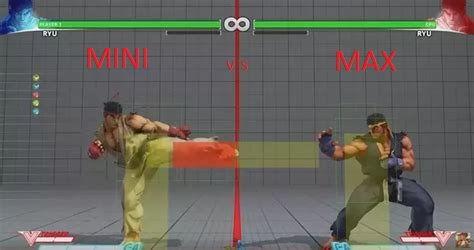

Speed, calculations and foresight are the weapons of Minimax ! For every action there is a reaction is the principle Minimax is based on. How many actions and reactions we can calculate is Fondamental for Our score.


**REASONABLE START POINT **
https://www.kaggle.com/alexisbcook/n-step-lookahead#Code

The starting point of the getting started Competition. Does a good lot of the footwork in the code writing and explains Minimax a bit. Though not as well as This MIT professor who phenominal and a pleasure to watch. https://www.youtube.com/watch?v=STjW3eH0Cik.
# 
# Alexis Cooks n-step-lookahead Agent
# 

**One Problem ! Now with the new Time restraints this does not work !! **

**It is slow, and three steps loookahead is not possible any longer. 
Should the number of steps we foresee be Fixed ? ? **


**With three moves possible. For 1 step lookahead i have 3 options : ***
![](http://i.imgur.com/aAYyy2I.png)



**Below, with 2 moves possible 3 steps ahead i have 2^3= 8 options:***
![](https://i.imgur.com/BrRe7Bu.png)


**It  is Exponential; And in these Cases the base counts a lot. It is esy for the speed to be bogged down with a huge number of calc. and possibilities. Witch would cause a Time Out Error.**
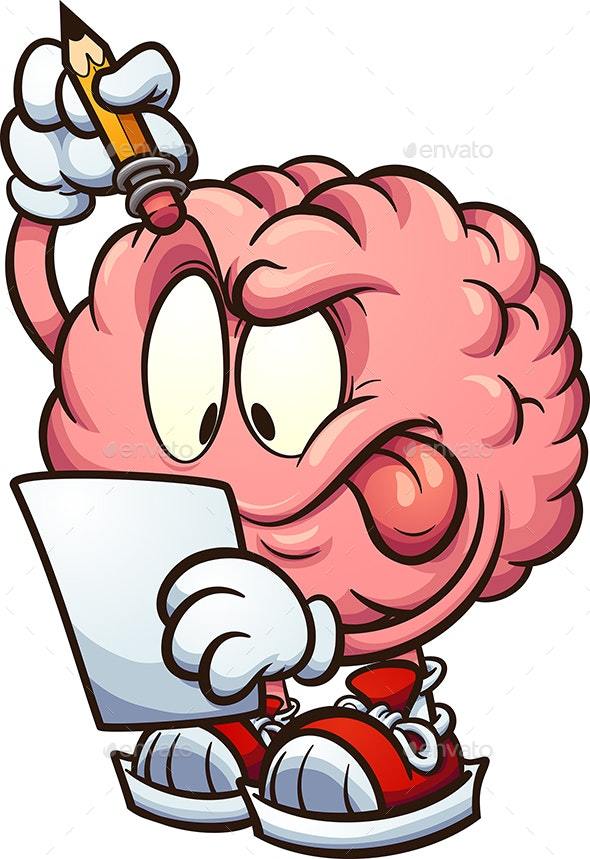


# Insigth Number 1 : Depth of foresight

How many steps i look ahead should therefore ( from what presented in the diagrams above )be vaiable and depend on the base of the exponent
I.E the number of places i can Go ! 
look up to 8 moves into the future !! on the same time restraint.

# Insight Number 2:  Speedup. Leaner N menaer Alg
This algorthim  Has many parts, count_windows, is_terminal, get heuristics, drop_piece, minimax. 
At a glance count windows and is_terminal in the agent are very similar. 
Repeating twice the process of going through all the board looking for pieces in a row is heavy. It can be done just Once as i do in my_leaner_Agent below. 
I test the speed Up with this adjustment below :

In [ ]:
def cooks_agent(obs, config): 
    import random
    import numpy as np

    # Gets board at next step if agent drops piece in selected column
    def drop_piece(grid, col, mark, config):
        next_grid = grid.copy()
        for row in range(config.rows-1, -1, -1):
            if next_grid[row][col] == 0:
                break
        next_grid[row][col] = mark
        return next_grid

    # Helper function for get_heuristic: checks if window satisfies heuristic conditions
    def check_window(window, num_discs, piece, config):
        return (window.count(piece) == num_discs and window.count(0) == config.inarow-num_discs)

    # Helper function for get_heuristic: counts number of windows satisfying specified heuristic conditions
    def count_windows(grid, num_discs, piece, config):
        num_windows = 0
        # horizontal
        for row in range(config.rows):
            for col in range(config.columns-(config.inarow-1)):
                window = list(grid[row, col:col+config.inarow])
                if check_window(window, num_discs, piece, config):
                    num_windows += 1
        # vertical
        for row in range(config.rows-(config.inarow-1)):
            for col in range(config.columns):
                window = list(grid[row:row+config.inarow, col])
                if check_window(window, num_discs, piece, config):
                    num_windows += 1
        # positive diagonal
        for row in range(config.rows-(config.inarow-1)):
            for col in range(config.columns-(config.inarow-1)):
                window = list(grid[range(row, row+config.inarow), range(col, col+config.inarow)])
                if check_window(window, num_discs, piece, config):
                    num_windows += 1
        # negative diagonal
        for row in range(config.inarow-1, config.rows):
            for col in range(config.columns-(config.inarow-1)):
                window = list(grid[range(row, row-config.inarow, -1), range(col, col+config.inarow)])
                if check_window(window, num_discs, piece, config):
                    num_windows += 1
        return num_windows

    def get_heuristic(grid, mark, config):
        num_threes = count_windows(grid, 3, mark, config)
        num_fours = count_windows(grid, 4, mark, config)
        num_threes_opp = count_windows(grid, 3, mark%2+1, config)
        num_fours_opp = count_windows(grid, 4, mark%2+1, config)
        score = num_threes - 1e2*num_threes_opp - 1e4*num_fours_opp + 1e6*num_fours
        return score

    def score_move(grid, col, mark, config, nsteps):
        next_grid = drop_piece(grid, col, mark, config)
        score = minimax(next_grid, nsteps-1, False, mark, config)
        return score

    # Helper function for minimax: checks if agent or opponent has four in a row in the window
    def is_terminal_window(window, config):
        return window.count(1) == config.inarow or window.count(2) == config.inarow

    # Helper function for minimax: checks if game has ended
    def is_terminal_node(grid, config):
        # Check for draw 
        if list(grid[0, :]).count(0) == 0:
            return True
        # Check for win: horizontal, vertical, or diagonal
        # horizontal 
        for row in range(config.rows):
            for col in range(config.columns-(config.inarow-1)):
                window = list(grid[row, col:col+config.inarow])
                if is_terminal_window(window, config):
                    return True
        # vertical
        for row in range(config.rows-(config.inarow-1)):
            for col in range(config.columns):
                window = list(grid[row:row+config.inarow, col])
                if is_terminal_window(window, config):
                    return True
        # positive diagonal
        for row in range(config.rows-(config.inarow-1)):
            for col in range(config.columns-(config.inarow-1)):
                window = list(grid[range(row, row+config.inarow), range(col, col+config.inarow)])
                if is_terminal_window(window, config):
                    return True
        # negative diagonal
        for row in range(config.inarow-1, config.rows):
            for col in range(config.columns-(config.inarow-1)):
                window = list(grid[range(row, row-config.inarow, -1), range(col, col+config.inarow)])
                if is_terminal_window(window, config):
                    return True
        return False

    # Minimax implementation
    def minimax(node, depth, maximizingPlayer, mark, config):
        is_terminal = is_terminal_node(node, config)
        valid_moves = [c for c in range(config.columns) if node[0][c] == 0]
        if depth == 0 or is_terminal:
            return get_heuristic(node, mark, config)
        if maximizingPlayer:
            value = -np.Inf
            for col in valid_moves:
                child = drop_piece(node, col, mark, config)
                value = max(value, minimax(child, depth-1, False, mark, config))
            return value
        else:
            value = np.Inf
            for col in valid_moves:
                child = drop_piece(node, col, mark%2+1, config)
                value = min(value, minimax(child, depth-1, True, mark, config))
            return value
    
    
    
    N_STEPS = 3
    # Get list of valid moves
    valid_moves = [c for c in range(config.columns) if obs.board[c] == 0]
    # Convert the board to a 2D grid
    grid = np.asarray(obs.board).reshape(config.rows, config.columns)
    # Use the heuristic to assign a score to each possible board in the next step
    scores = dict(zip(valid_moves, [score_move(grid, col, obs.mark, config, N_STEPS) for col in valid_moves]))
    # Get a list of columns (moves) that maximize the heuristic
    max_cols = [key for key in scores.keys() if scores[key] == max(scores.values())]
    # Select at random from the maximizing columns
    return random.choice(max_cols)    

In [ ]:
def my_leaner_Agent(obs, config): 
    import numpy as np

    def drop_piece(grid, col, mark, config):
        next_grid = grid.copy()
        for row in range(config.rows-1, -1, -1):
            if next_grid[row][col] == 0:
                break
        next_grid[row][col] = mark
        return next_grid

    def createNcheck_windows(grid, piece):
        my_3,my_4,op_3,op_4 = 0,0,0,0
        # horizontal
        for row in range(6):
            for col in range(4):
                window = list(grid[row, col:col+4])                
                if (window.count(piece) == 3 and window.count(0) == 1):
                    my_3 += 1
                elif (window.count(piece%2+1) == 3 and window.count(0) == 1):
                    op_3 += 1
                elif (window.count(piece) == 4 and window.count(0) == 0):
                    my_4 += 1
                elif (window.count(piece%2+1) == 4 and window.count(0) == 0):
                    op_4 += 1       
        # vertical
        for row in range(3):
            for col in range(7):
                window = list(grid[row:row+4, col])
                if (window.count(piece) == 3 and window.count(0) == 1):
                    my_3 += 1
                elif (window.count(piece%2+1) == 3 and window.count(0) == 1):
                    op_3 += 1
                elif (window.count(piece) == 4 and window.count(0) == 0):
                    my_4 += 1
                elif (window.count(piece%2+1) == 4 and window.count(0) == 0):
                    op_4 += 1
        # positive diagonal
        for row in range(3):
            for col in range(4):
                window = list(grid[range(row, row+4), range(col, col+4)])
                if (window.count(piece) == 3 and window.count(0) == 1):
                    my_3 += 1
                elif (window.count(piece%2+1) == 3 and window.count(0) == 1):
                    op_3 += 1
                elif (window.count(piece) == 4 and window.count(0) == 0):
                    my_4 += 1
                elif (window.count(piece%2+1) == 4 and window.count(0) == 0):
                    op_4 += 1
        # negative diagonal
        for row in range(3, 6):
            for col in range(4):
                window = list(grid[range(row, row-4, -1), range(col, col+4)])
                if (window.count(piece) == 3 and window.count(0) == 1):
                    my_3 += 1
                elif (window.count(piece%2+1) == 3 and window.count(0) == 1):
                    op_3 += 1
                elif (window.count(piece) == 4 and window.count(0) == 0):
                    my_4 += 1
                elif (window.count(piece%2+1) == 4 and window.count(0) == 0):
                    op_4 += 1

        is_term = ((my_4 != 0) or (op_4!=0))  

        return is_term,my_3,my_4,op_3,op_4 


    # Helper function for minimax: calculates value of heuristic for grid
    def get_heuristic(my_3,my_4,op_3,op_4):        
        score = 10*my_3 - 15*op_3 - 1e4*op_4 + 1e6*my_4
        return score

    # Uses minimax to calculate value of dropping piece in selected column
    def score_move(grid, col, mark, config, nsteps):
        next_grid = drop_piece(grid, col, mark, config)
        score = minimax(next_grid, nsteps-1, False, mark, config)
        return score

    # Minimax implementation with alfabeta pruning
    def minimax(node, depth, maximizingPlayer, mark, config):
        is_term,my_3,my_4,op_3,op_4 = createNcheck_windows(node,mark)#mark being my piece
        is_terminal = is_term
        valid_moves = [c for c in range(config.columns) if node[0][c] == 0]
        if is_terminal:
            value = get_heuristic(my_3,my_4,op_3,op_4)
            if value > 1e5:
                value= 1e5+ 1e5*(depth)
            if value < - 1e3:
                value= -(1e4- 1e3*(depth))
            return value
        if depth == 0  or len(valid_moves)== 0 :
            return get_heuristic(my_3,my_4,op_3,op_4)
            

        if maximizingPlayer:
            value = -np.Inf

            for col in valid_moves:
                child = drop_piece(node, col, mark, config)
                miniv =minimax(child, depth-1, False, mark, config)
                value = max(value, miniv)
                if value > 1e5:##ALFA BETA PRUNING
                    winning_depth = (value -1e5)%1e5
                    if winning_depth>=  (depth-1):
                        break

            return value
        else:
            value = np.Inf
            for col in valid_moves:
                child = drop_piece(node, col, mark%2+1, config)
                miniv = minimax(child, depth-1, True, mark, config)
                value = min(value,miniv )
    #                 if value<=-1e3:##ALFA BETA PRUNING no alfa beta pruning fighting to the end (furthest away poss.)
    # #                     winning_depth = (value +1e4)%1e3
    # #                     if winning_depth>=  (depth-1):
    # #                         break

            return value


    # Your code here: Amend the agent!
    # Get list of valid moves
    valid_moves = [c for c in range(config.columns) if obs.board[c] == 0]
    # Convert the board to a 2D grid
    grid = np.asarray(obs.board).reshape(config.rows, config.columns)
    # Use the heuristic to assign a score to each possible board in the next step
    N_STEPS=3       
   

    scores = dict(zip(valid_moves, [score_move(grid, col, obs.mark, config, N_STEPS) for col in valid_moves]))
    # Get a list of columns (moves) that maximize the heuristic
    max_cols = [key for key in scores.keys() if scores[key] == max(scores.values())]
    
    
    # Select at random from the maximizing columns 
    return max_cols[len(max_cols)//2]

In [ ]:
from kaggle_environments import make, evaluate
import time
env = make("connectx")

def speedcheck (Magent):
    start = time.time()
    actions=[];
    for i in range (3):
        moves= env.run([Magent, "random"]) 
        [actions.append(moves[i][0]['action']) for i in range (1,len(moves),2)]
    end = time.time()
    print('Ran game simulations in {} s \n now have {} moves in dataset '.format((end - start),len(actions)))  
    print('{} seconds per move'.format((end - start)/len(actions)))

# Test

In [ ]:
speedcheck(cooks_agent)

In [ ]:
speedcheck(my_leaner_Agent)

# More than twice as Fast !!
just like in a pit fight lighting speed is necessary, here it is too. The Faster i am the more i can do ..
Immagine before if i did 6^3 - 216 scenarios ( Six say because one column is already full) . That would take too long, 
or would it ?? With the old sistem yes. With the New ? no ! i have halfed the time it takes. I can do it. so why not ?

# Alg. with Mod 1+2


In [ ]:
def my_007(obs, config): 
    import numpy as np

    def drop_piece(grid, col, mark, config):
        next_grid = grid.copy()
        for row in range(config.rows-1, -1, -1):
            if next_grid[row][col] == 0:
                break
        next_grid[row][col] = mark
        return next_grid

    def createNcheck_windows(grid, piece):
        my_3,my_4,op_3,op_4 = 0,0,0,0
        # horizontal
        for row in range(6):
            for col in range(4):
                window = list(grid[row, col:col+4])                
                if (window.count(piece) == 3 and window.count(0) == 1):
                    my_3 += 1
                elif (window.count(piece%2+1) == 3 and window.count(0) == 1):
                    op_3 += 1
                elif (window.count(piece) == 4 and window.count(0) == 0):
                    my_4 += 1
                elif (window.count(piece%2+1) == 4 and window.count(0) == 0):
                    op_4 += 1       
        # vertical
        for row in range(3):
            for col in range(7):
                window = list(grid[row:row+4, col])
                if (window.count(piece) == 3 and window.count(0) == 1):
                    my_3 += 1
                elif (window.count(piece%2+1) == 3 and window.count(0) == 1):
                    op_3 += 1
                elif (window.count(piece) == 4 and window.count(0) == 0):
                    my_4 += 1
                elif (window.count(piece%2+1) == 4 and window.count(0) == 0):
                    op_4 += 1
        # positive diagonal
        for row in range(3):
            for col in range(4):
                window = list(grid[range(row, row+4), range(col, col+4)])
                if (window.count(piece) == 3 and window.count(0) == 1):
                    my_3 += 1
                elif (window.count(piece%2+1) == 3 and window.count(0) == 1):
                    op_3 += 1
                elif (window.count(piece) == 4 and window.count(0) == 0):
                    my_4 += 1
                elif (window.count(piece%2+1) == 4 and window.count(0) == 0):
                    op_4 += 1
        # negative diagonal
        for row in range(3, 6):
            for col in range(4):
                window = list(grid[range(row, row-4, -1), range(col, col+4)])
                if (window.count(piece) == 3 and window.count(0) == 1):
                    my_3 += 1
                elif (window.count(piece%2+1) == 3 and window.count(0) == 1):
                    op_3 += 1
                elif (window.count(piece) == 4 and window.count(0) == 0):
                    my_4 += 1
                elif (window.count(piece%2+1) == 4 and window.count(0) == 0):
                    op_4 += 1

        is_term = ((my_4 != 0) or (op_4!=0))  

        return is_term,my_3,my_4,op_3,op_4 


    # Helper function for minimax: calculates value of heuristic for grid
    def get_heuristic(my_3,my_4,op_3,op_4):        
        score = 10*my_3 - 15*op_3 - 1e4*op_4 + 1e6*my_4
        return score

    # Uses minimax to calculate value of dropping piece in selected column
    def score_move(grid, col, mark, config, nsteps):
        next_grid = drop_piece(grid, col, mark, config)
        score = minimax(next_grid, nsteps-1, False, mark, config)
        return score

    # Minimax implementation with alfabeta pruning
    def minimax(node, depth, maximizingPlayer, mark, config):
        is_term,my_3,my_4,op_3,op_4 = createNcheck_windows(node,mark)#mark being my piece
        is_terminal = is_term
        valid_moves = [c for c in range(config.columns) if node[0][c] == 0]
        if is_terminal:
            value = get_heuristic(my_3,my_4,op_3,op_4)
            if value > 1e5:
                value= 1e5+ 1e5*(depth)
            if value < - 1e3:
                value= -(1e4- 1e3*(depth))
            return value
        if depth == 0  or len(valid_moves)== 0 :
            return get_heuristic(my_3,my_4,op_3,op_4)
            

        if maximizingPlayer:
            value = -np.Inf

            for col in valid_moves:
                child = drop_piece(node, col, mark, config)
                miniv =minimax(child, depth-1, False, mark, config)
                value = max(value, miniv)
                if value > 1e5:##ALFA BETA PRUNING
                    winning_depth = (value -1e5)%1e5
                    if winning_depth>=  (depth-1):
                        break

            return value
        else:
            value = np.Inf
            for col in valid_moves:
                child = drop_piece(node, col, mark%2+1, config)
                miniv = minimax(child, depth-1, True, mark, config)
                value = min(value,miniv )
    #                 if value<=-1e3:##ALFA BETA PRUNING no alfa beta pruning fighting to the end (furthest away poss.)
    # #                     winning_depth = (value +1e4)%1e3
    # #                     if winning_depth>=  (depth-1):
    # #                         break

            return value


    # Your code here: Amend the agent!
    # Get list of valid moves
    valid_moves = [c for c in range(config.columns) if obs.board[c] == 0]
    # Convert the board to a 2D grid
    grid = np.asarray(obs.board).reshape(config.rows, config.columns)
    # Use the heuristic to assign a score to each possible board in the next step
    if len(valid_moves)  == 7 :
        N_STEPS=2
    elif len(valid_moves)  == 6 :
        N_STEPS=3
    elif len(valid_moves)  == 5 :
        N_STEPS=3       
    elif len(valid_moves)  == 4 :
        N_STEPS=4
    elif len(valid_moves)  == 3 :
        N_STEPS=5   
    elif len(valid_moves)  == 2 :
        N_STEPS=8   
    else :
        return valid_moves[0]

    scores = dict(zip(valid_moves, [score_move(grid, col, obs.mark, config, N_STEPS) for col in valid_moves]))
    # Get a list of columns (moves) that maximize the heuristic
    max_cols = [key for key in scores.keys() if scores[key] == max(scores.values())]
    
    
    # Select at random from the maximizing columns 
    return max_cols[len(max_cols)//2]

**notice the elif statements at the bottom ! Up to 8 Steps Ahead**


# Learner And Much Meaner Agent !!!

In [ ]:
# def get_win_percentages(agent1, agent2, n_rounds=20):
#     # Use default Connect Four setup
#     config = {'rows': 6, 'columns': 7, 'inarow': 4}
#     # Agent 1 goes first (roughly) half the time          
#     outcomes = evaluate("connectx", [agent1, agent2], config, [], n_rounds//2)
#     # Agent 2 goes first (roughly) half the time      
#     outcomes += [[b,a] for [a,b] in evaluate("connectx", [agent2, agent1], config, [], n_rounds-n_rounds//2)]
#     print("Agent 1 Win Percentage:", np.round(outcomes.count([1,-1])/len(outcomes), 2))
#     print("Agent 2 Win Percentage:", np.round(outcomes.count([-1,1])/len(outcomes), 2))
#     print("Number of Invalid Plays by Agent 1:", outcomes.count([None, 0]))
#     print("Number of Invalid Plays by Agent 2:", outcomes.count([0, None]))
    

In [ ]:
# get_win_percentages(agent1=my_agent2, agent2=my_agent3)
# get_win_percentages(agent1=my_agent2, agent2=my_agent3a)

In [ ]:
import inspect
import os

def write_agent_to_file(function, file):
    with open(file, "a" if os.path.exists(file) else "w") as f:
        f.write(inspect.getsource(function))
        print(function, "written to", file)

write_agent_to_file(my_007, "submission.py")

In [ ]:
import sys
from kaggle_environments import utils
from kaggle_environments import agent
out = sys.stdout

submission = utils.read_file("/kaggle/working/submission.py")
my_agent = agent.get_last_callable (submission)
sys.stdout = out

env = make("connectx", debug=True)
env.run([my_agent, my_agent])
print("Success!" if env.state[0].status == env.state[1].status == "DONE" else "Failed...")